In [1]:
from lib.notebook_imports import *

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

%load_ext autoreload
%autoreload 2

shap.initjs()

start_time = datetime.now()


The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.


# READ DATA

In [5]:
from dotenv import load_dotenv
load_dotenv()
DATA_PATH = os.environ.get("DATA_PATH")

In [25]:
data_900 = read_data(DATA_PATH, merge_with_meds=True, merge_with_patient_genes=True)
data_900_df = data_900.input_df
data_2015_df = read_data_2015(DATA_PATH)

#LGB_PARAMS_BASE, N_FOLDS, ALL_MODEL_SUFFIXES, BASE_COLS_1, BASE_COLS_2 = get_consts()



Converting ds_1_result_num_E2 to float
Converting ds_1_result_num_LH to float
Converting ds_1_result_num_PRG to float
Converting ds_1_result_num_AMH to float
Converting ds_789_result_num_E2 to float
Converting amh_qual_result_num to float
Converting qual_result_num_FSH to float
Converting qual_result_num_DHEAS to float
Converting qual_result_num_Inh_B to float
Converting qual_result_num_TST to float
Converting qual_result_num_anty_TPO to float
Converting qual_result_num_TSH to float
Converting qual_result_num_SHBG to float
weight    0.503356
height    0.492170
bmi       0.460850
dtype: float64
pickups_df:                  981
merged with meds_df:         936
merged with patient_gens_df: 922
merged with poli_changes_df: 922
merged with causes_df: 922
merged with patient_groups_df: 922
merged with body_df: 922



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


-
dhea_s:          low: 2%,  normal: 87%, high: 11%, filled: 63%, ()
shbg:            low: 1%,  normal: 80%, high: 19%, filled: 39%, ()
testosterone:    low: 49%, normal: 46%, high: 5%, filled: 40%, ()
fsh:             low: 9%,  normal: 64%, high: 26%, filled: 45%, (?)
tsh:             low: 65%, normal: 32%, high: 3%, filled: 72%, ()
lh:              low: 5%,  normal: 74%, high: 22%, filled: 28%, (faza folikularna)
e2:              low: 86%, normal: 10%, high: 3%, filled: 35%, (faza folikularna)
inhibina_b:      low: 34%, normal: 46%, high: 21%, filled: 48%, (faza folikularna)
-
valid_dhea_s:    low: 1%,  normal: 87%, high: 12%, filled: 48%, ()
valid_shbg:      low: 1%,  normal: 79%, high: 20%, filled: 23%, ()
valid_testosterone: low: 53%, normal: 42%, high: 5%, filled: 24%, ()
valid_fsh:       low: 7%,  normal: 62%, high: 30%, filled: 25%, (?)
valid_tsh:       low: 62%, normal: 35%, high: 2%, filled: 57%, ()
valid_lh:        low: 5%,  normal: 70%, high: 25%, filled: 16%, (faza folikul

Columns (22,34,43,47,51,57,62,82,238,240) have mixed types.Specify dtype option on import or set low_memory=False.


Data len - before drop_duplicates(process_number): 13084
Data len - after drop_duplicates(process_number): 12892
Data len: 12892
Data len: 12892 after merge with causes
Converting ds_1_result_num_E2 to float
Converting ds_1_result_num_LH to float
Converting ds_1_result_num_PRG to float
Converting ds_1_result_num_AMH to float
Converting amh_qual_result_num to float
Converting qual_result_num_FSH to float
Converting qual_result_num_DHEAS to float
Converting qual_result_num_Inh_B to float
Converting qual_result_num_TST to float
Converting qual_result_num_anty_TPO to float
Converting qual_result_num_TSH to float
Converting qual_result_num_SHBG to float
Converting ds1_3_dawka to float
Converting ds1_7_dawka to float
-
FSH:             low: 8%,  normal: 76%, high: 15%, filled: 42%, (?)
DHEAS:           low: 3%,  normal: 87%, high: 10%, filled: 59%, ()
Inh_B:           low: 30%, normal: 40%, high: 29%, filled: 45%, (faza folikularna)
TST:             low: 54%, normal: 44%, high: 2%, filled: 4

# BASE EXPERIMENTS

In [3]:
BASE_RESULTS = perform_base_experiments(
    LGB_PARAMS_BASE,
    DATA_SERIES,
    ALL_MODEL_SUFFIXES,
    ['l2'],
    [BASE_COLS_1, BASE_COLS_2]
)

invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in log
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
invalid value en

-
RMSE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   4.67    
MAE[fold_avg][l2][900_cumulus_denuded]:        count:530    avg:7.64   3.40    
MAPE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   0.86    
LIKELIHOOD[fold_avg][l2][900_cumulus_denuded]: count:530    avg:7.64   4.57    
-----------------------------
-
RMSE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   3.55    
MAE[fold_avg][l2][900_day_0_mii]:              count:516    avg:5.92   2.65    
MAPE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   0.75    
LIKELIHOOD[fold_avg][l2][900_day_0_mii]:       count:516    avg:5.92   3.30    
-----------------------------
-
RMSE[fold_avg][l2][2015_cumulus_denuded]:      count:8673   avg:9.08   4.77    
MAE[fold_avg][l2][2015_cumulus_denuded]:       count:8673   avg:9.08   3.58    
MAPE[fold_avg][l2][2015_cumulus_denuded]:      count:8673   avg:9.08   0.66    
LIKELIHOOD[fold_avg][l2][2015_cumulus_denuded]: count:

invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in log
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in log
divide by zero encountered in double_scalars
divide by zero encountered in double_scalar

-
RMSE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   4.41    (-0.26)    
MAE[fold_avg][l2][900_cumulus_denuded]:        count:530    avg:7.64   3.16    (-0.24)    
MAPE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   0.75    (-0.11)    
LIKELIHOOD[fold_avg][l2][900_cumulus_denuded]: count:530    avg:7.64   4.57    (0.00)    
-----------------------------
-
RMSE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   3.53    (-0.02)    
MAE[fold_avg][l2][900_day_0_mii]:              count:516    avg:5.92   2.58    (-0.06)    
MAPE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   0.71    (-0.04)    
LIKELIHOOD[fold_avg][l2][900_day_0_mii]:       count:516    avg:5.92   3.30    (0.00)    
-----------------------------
-
RMSE[fold_avg][l2][2015_cumulus_denuded]:      count:8673   avg:9.08   4.54    (-0.22)    
MAE[fold_avg][l2][2015_cumulus_denuded]:       count:8673   avg:9.08   3.39    (-0.19)    
MAPE[fold_avg][l2][2015_cu

In [8]:
LGB_PARAMS_BASE, N_FOLDS, ALL_MODEL_SUFFIXES, BASE_COLS_1, BASE_COLS_2, ranking_cols = get_consts()

# TRAIN PRIMARY MODEL

In [31]:
data_2015_df['endometrium_num'] = data_2015_df.ds1_gr_endometrium.str.replace(',','.').astype(float)

In [32]:
DATA_SERIES_900, DATA_SERIES_2015, DATA_SERIES = prepare_data_series(data_900_df, data_2015_df, 5)

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the param

-
RMSE[ test_fold_avg][l2][2015_cumulus_denuded]: count:9903   avg:9.71   4.97    (0.00)    
MAE[ test_fold_avg][l2][2015_cumulus_denuded]: count:9903   avg:9.71   3.64    (0.00)    
MAPE[ test_fold_avg][l2][2015_cumulus_denuded]: count:9903   avg:9.71   0.61    (0.00)    
LIKELIHOOD[ test_fold_avg][l2][2015_cumulus_denuded]: count:9903   avg:9.71   7.06    (0.00)    
-----------------------------
-
RMSE[ test_fold_avg][l2][2015_day_0_mii]:      count:9515   avg:7.34   4.09    (0.00)    
MAE[ test_fold_avg][l2][2015_day_0_mii]:       count:9515   avg:7.34   3.01    (0.00)    
MAPE[ test_fold_avg][l2][2015_day_0_mii]:      count:9515   avg:7.34   0.65    (0.00)    
LIKELIHOOD[ test_fold_avg][l2][2015_day_0_mii]: count:9515   avg:7.34   4.91    (0.00)    
-----------------------------
-
RMSE[ test_fold_avg][l2][2015_dslast_pech_licz]: count:9858   avg:12.38  5.44    (0.00)    
MAE[ test_fold_avg][l2][2015_dslast_pech_licz]: count:9858   avg:12.38  3.88    (0.00)    
MAPE[ test_fold_avg][

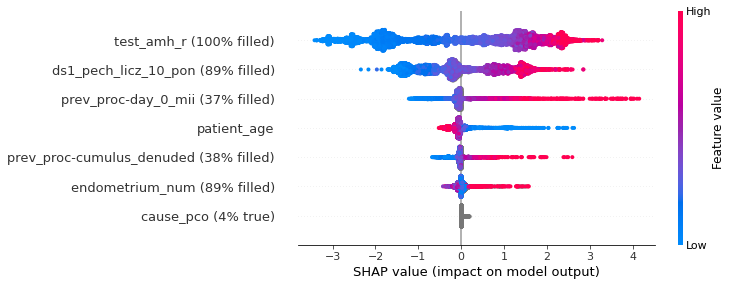

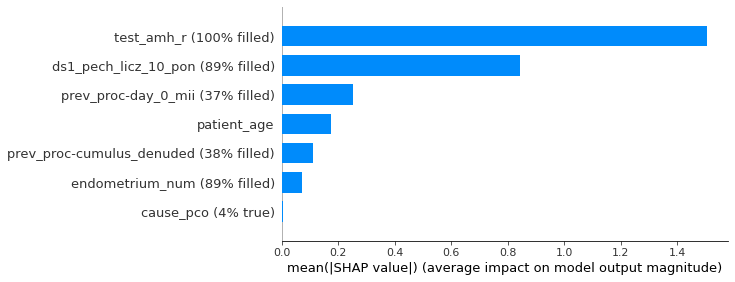

(array([[-6.41498954e-01, -7.42659194e-02,  2.76148136e-01, ...,
         -5.31668209e-02, -8.23452460e-04, -1.01479572e-01],
        [-7.84061341e-01, -6.16358878e-02, -9.31779421e-01, ...,
         -5.57688823e-02, -8.23452460e-04, -5.86982679e-02],
        [-3.06516832e+00, -3.30863655e-01, -1.29592793e+00, ...,
         -1.59298258e-01, -3.59543538e-04, -6.42278352e-04],
        ...,
        [ 2.80624812e-01,  7.22897067e-01,  1.42710686e+00, ...,
          6.21679001e-01, -3.12919568e-03, -9.32119312e-02],
        [ 1.49463842e+00,  6.57542141e-02,  1.55851889e+00, ...,
         -7.00817036e-02, -2.83545023e-03, -3.34475931e-02],
        [-3.57229750e-01, -8.60172333e-02, -1.52002736e-01, ...,
         -5.48264131e-02, -6.10039979e-03,  4.42193033e-02]]),
        test_amh_r  patient_age  ds1_pech_licz_10_pon  \
 7987        1.860           38                  15.0   
 7988        1.860           39                   8.0   
 12104       0.260           41                   6.0   
 

In [33]:
PRIMARY_COLS = [
    #"prot_type_cat",
    "test_amh_r",
    "patient_age",
    "ds1_pech_licz_10_pon",
    "prev_proc-cumulus_denuded",
    "prev_proc-day_0_mii",
    "cause_pco",
    "endometrium_num"
]

PRIMARY_RESULTS = train_data_series(
    LGB_PARAMS_BASE,
    DATA_SERIES_2015,
    PRIMARY_COLS,
    model_suffixes_filter=['l2'])

PRIMARY_RESULTS.print_errors(
    [PRIMARY_RESULTS],
    print_suffixes=['l2'],
    print_avg=True,
)

explain_model(
    PRIMARY_RESULTS,
    data_serie_name='2015_day_0_mii',
    model_suffix='l2',
    folds=range(0, N_FOLDS))

# PREPARE DATA FROM PRIMARY MODEL

In [5]:
MERGED_PRIMARY_TEST_DF = PRIMARY_RESULTS.get_merged_test_dfs_from_folds('2015_day_0_mii')
MERGED_PRIMARY_TEST_DF['day_0_mii / prediction_l2'] = \
    MERGED_PRIMARY_TEST_DF['day_0_mii'] / MERGED_PRIMARY_TEST_DF['prediction_l2']

# ANTYKONCEPCJA - PODSTAWOWE DANE

<span style='background:yellow'>
Uwagi / wnioski:
</span>

- Z praktyki wiadomo, że dane wejściowe mogą mieć przekłamania. Często się zdarza, że dane uwględniają tylko dni od rozpoczęcia protokołu, mimo tego, że antykoncepcja była przyjmowana wcześniej.

- Bardzo rzadko występują wartości > 28. To sugeruje, że większość pacjentek przyjmuje antykoncepcję do początku najbliższego cyklu i zaczynana jest stymulacja.

- Jest stosowana głównie w protokole długim i progesteronowym. W pozostałych protokołach znacznie rzadziej i tych protokołów jest mniej, więc trudno o jednoznaczne wnioski.

In [6]:
PROTOCOLS = [
    "prot_long",
    "prot_progesteron",
    "prot_short_agonist",
    "prot_short_antagonista",
]

In [7]:
agg_df = MERGED_PRIMARY_TEST_DF.groupby(by='prot_type')[['one_in_every_row', 'days_count_Antykoncepcja']].count()
agg_df.rename(columns={
    'one_in_every_row': 'count',
    'days_count_Antykoncepcja': 'count_with_Antykoncepcja',
}, inplace=True)
agg_df['percent_with_Antykoncepcja'] = round(agg_df['count_with_Antykoncepcja'] / agg_df['count'], 2)
agg_df = agg_df.sort_values(by='count', ascending=False)
display(agg_df)


,count,count_with_Antykoncepcja,percent_with_Antykoncepcja
prot_type,,,
prot_long,6172,5980,0.97
prot_progesteron,933,494,0.53
prot_short_agonist,670,116,0.17
prot_short_antagonista,653,91,0.14
prot_other,146,43,0.29


<AxesSubplot:>

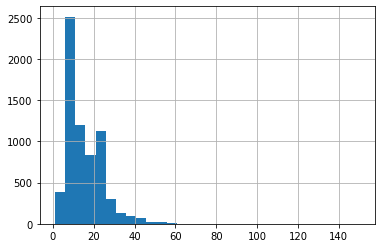

In [8]:
MERGED_PRIMARY_TEST_DF['days_count_Antykoncepcja'].hist(bins=30)

prot_long:


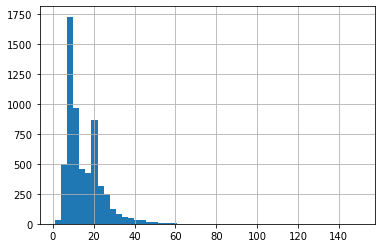

prot_progesteron:


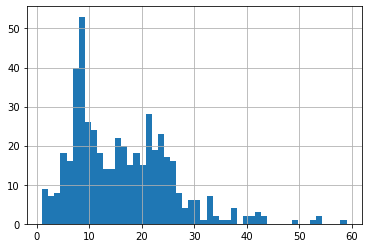

prot_short_agonist:


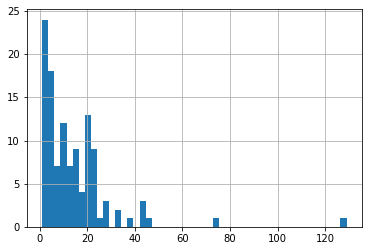

prot_short_antagonista:


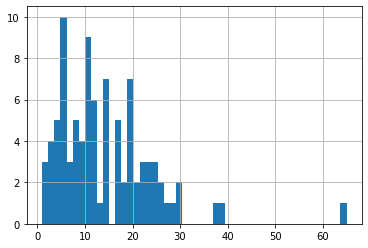

In [9]:
for prot_type in PROTOCOLS:
    PROT_DF = MERGED_PRIMARY_TEST_DF[MERGED_PRIMARY_TEST_DF['prot_type'] == prot_type]
    print(f'{prot_type}:')
    plt.show(PROT_DF['days_count_Antykoncepcja'].hist(bins=50))
    

# ANTYKONCEPCJA - ANALIZA ZALEŻNOŚCI

<span style='background:yellow'>
Uwagi / wnioski:
</span>

- W protokole długim nie widać, żeby przedłużona antykoncepcja wpływała znacząco na wyniki mii, a wręcz przeciwnie. Może to być spowodowane tym, że "gorsze" pacjentki specjalnie dostają dłużej antykoncepcję. 

- W protokole progesteronowym trochę widać pewną poprawę, aczkolwiek tych przypadków jest stosunkowo mało i pojedyńcze przypadki mogą znacząco wpływać na wyniki.

- W protokołach krótkich z agonistą i antagonistą antykoncepcja jest stosowana rzadko, tych protokołów jes mało - trudno o jednoznaczne wnioski.


In [10]:
DICT_SPLIT_BY_VALUE_28 = {}
for value in MERGED_PRIMARY_TEST_DF['days_count_Antykoncepcja'].unique():
    if np.isnan(value):
        continue
    if value <= 28:
        DICT_SPLIT_BY_VALUE_28[value] = "antykoncepcja <= 28 dni"
    else:
        DICT_SPLIT_BY_VALUE_28[value] = "antykoncepcja > 28 dni"

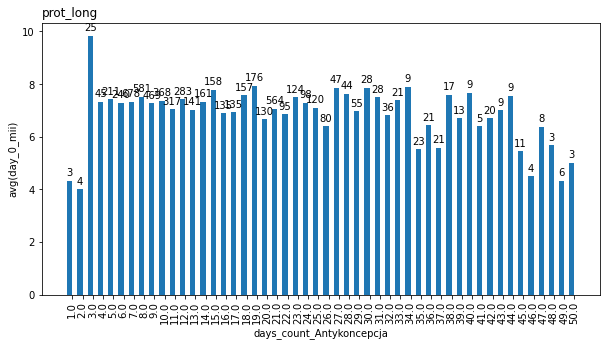

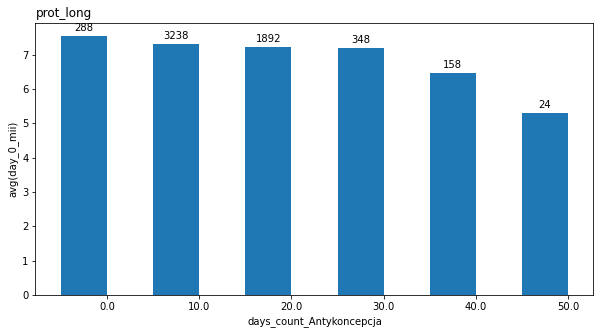

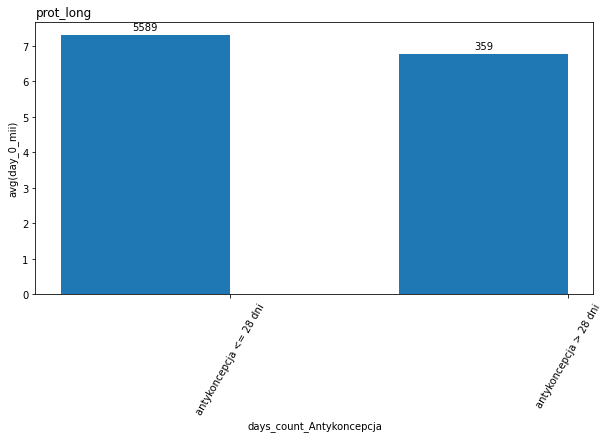

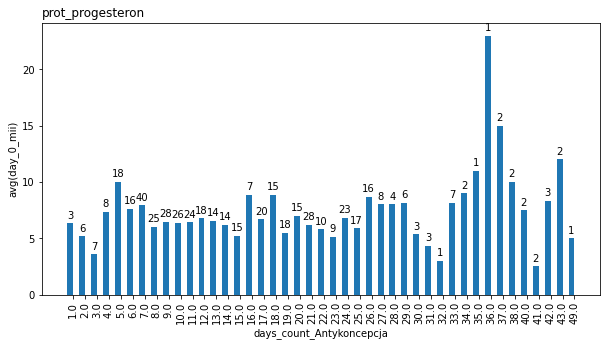

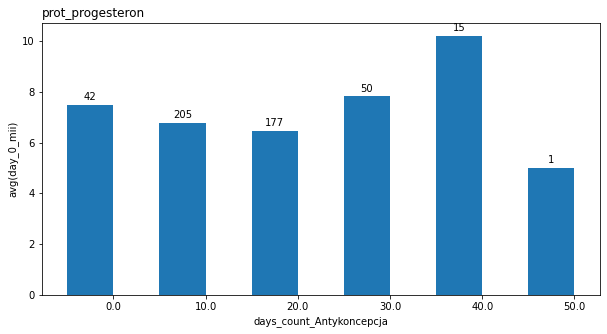

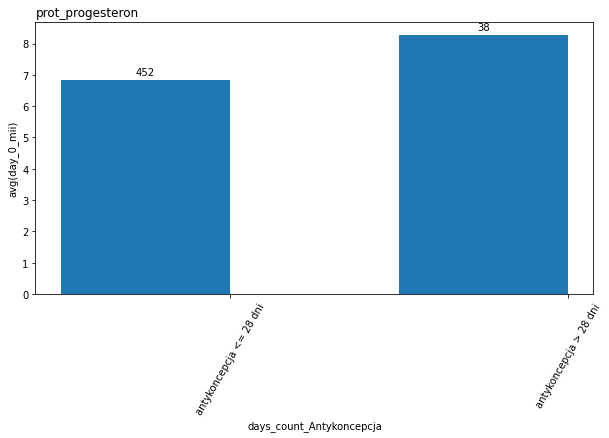

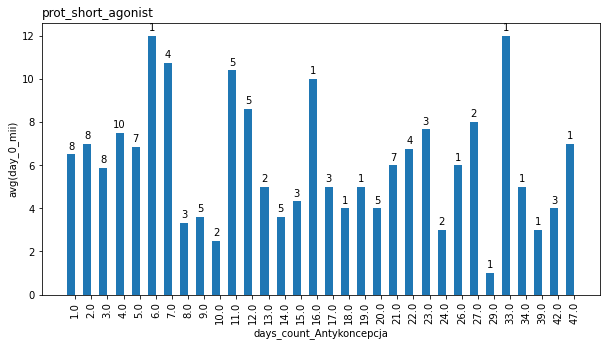

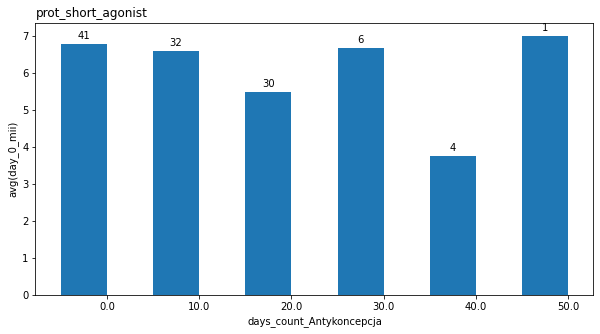

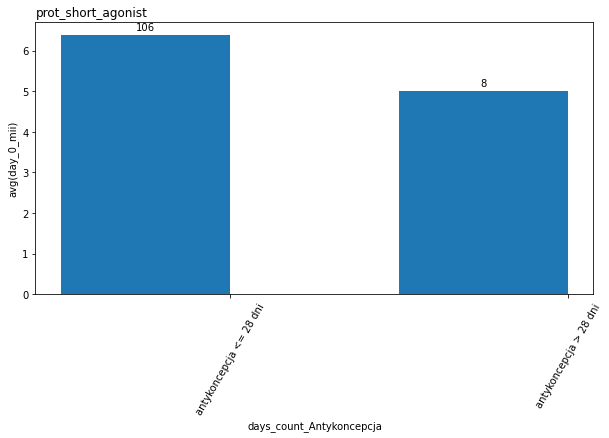

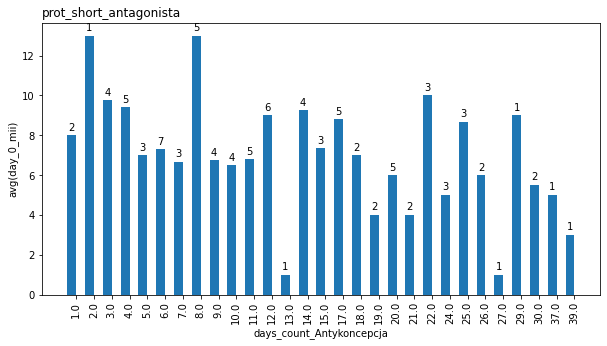

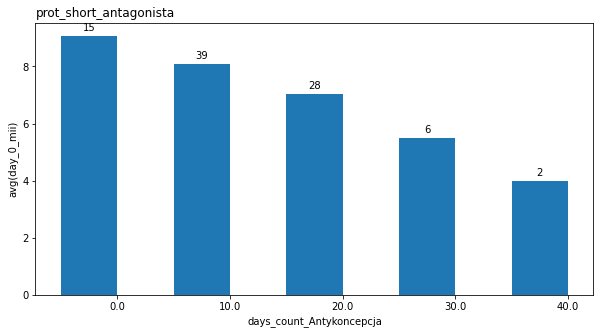

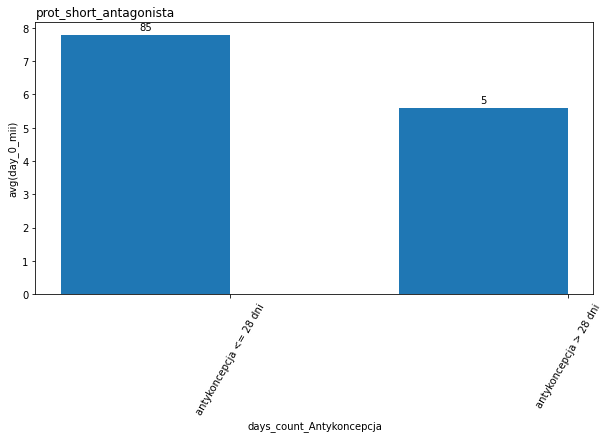

In [11]:
for prot_type in PROTOCOLS:

    PROT_DF = MERGED_PRIMARY_TEST_DF[MERGED_PRIMARY_TEST_DF['prot_type'] == prot_type]

    plot_results_with_segments_and_groups(
        PROT_DF,
        target_col='day_0_mii',
        target_agg='avg',
        segmentation_col='one_in_every_row', top_segments=10, segments=None,
        groupby_col='days_count_Antykoncepcja', groupby_round=0, groupby_min=0, groupby_max=50,
        groupby_dict=None,
        title=prot_type,
        legend_location=None)
    
    plot_results_with_segments_and_groups(
        PROT_DF,
            target_col='day_0_mii',
        target_agg='avg',
        segmentation_col='one_in_every_row', top_segments=10, segments=None,
        groupby_col='days_count_Antykoncepcja', groupby_round=-1, groupby_min=0, groupby_max=50,
        groupby_dict=None,
        title=prot_type,
        legend_location=None)
    
    plot_results_with_segments_and_groups(
        PROT_DF,
        target_col='day_0_mii',
        target_agg='avg',
        segmentation_col='one_in_every_row', top_segments=10, segments=None,
        groupby_col='days_count_Antykoncepcja', groupby_round=0, groupby_min=0, groupby_max=50,
        groupby_dict=DICT_SPLIT_BY_VALUE_28,
        title=prot_type,
        legend_location=None)


# ANTYKONCEPCJA - ANALIZA COUNTERFACTUALNA

<span style='background:yellow'>
Uwagi / wnioski:
</span>

- Jeżeli gdzieś widać wpływ przedłużonej antykoncepcji, to w protokole z progesteronem
- Tych danych jest tak niewiele, że trudno oczekiwać, że model się tego nauczy

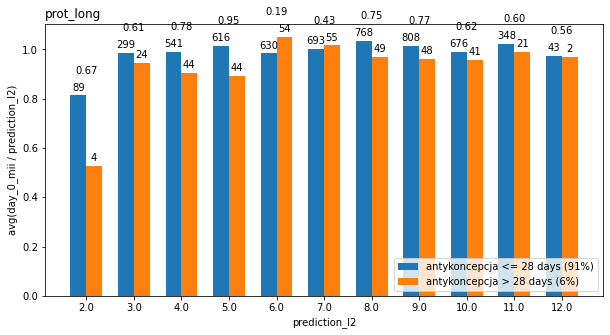

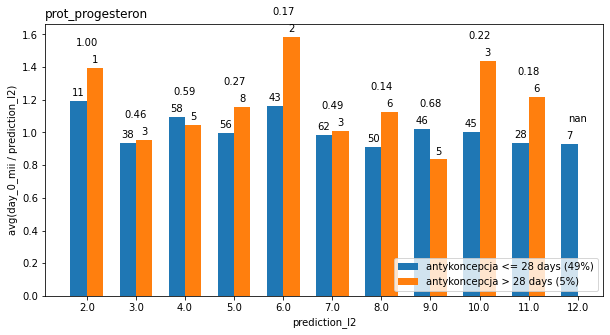

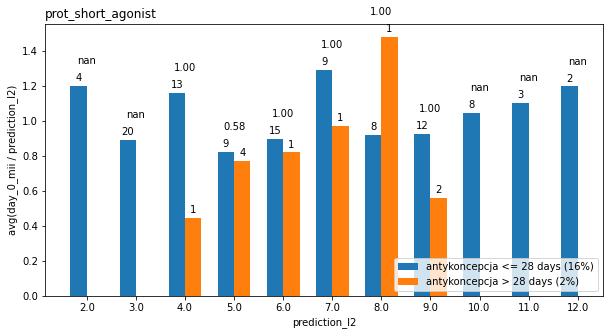

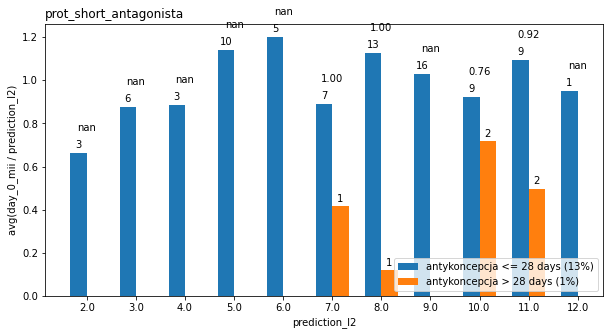

In [12]:
for prot_type in PROTOCOLS:

    PROT_DF = MERGED_PRIMARY_TEST_DF[MERGED_PRIMARY_TEST_DF['prot_type'] == prot_type]
    
    plot_results_with_segments_and_groups(
        PROT_DF,
        target_col='day_0_mii / prediction_l2',
        target_agg='avg',
        segmentation_col='days_count_Antykoncepcja_limited', top_segments=10, segments=None,
        groupby_col='prediction_l2', groupby_round=0, groupby_min=0, groupby_max=12,
        groupby_dict=None,
        title=prot_type,
        legend_location='lower right',
    )


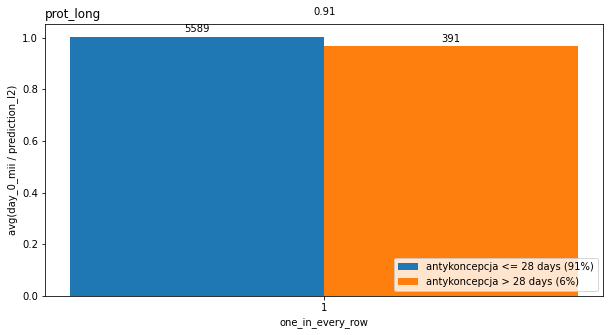

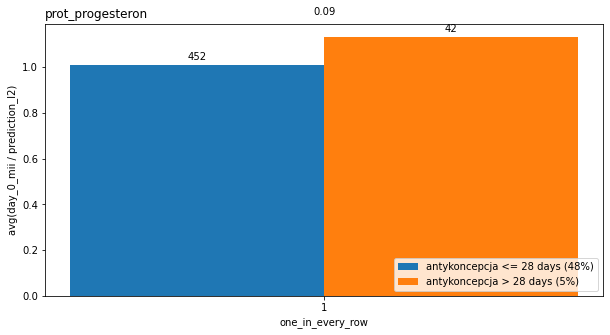

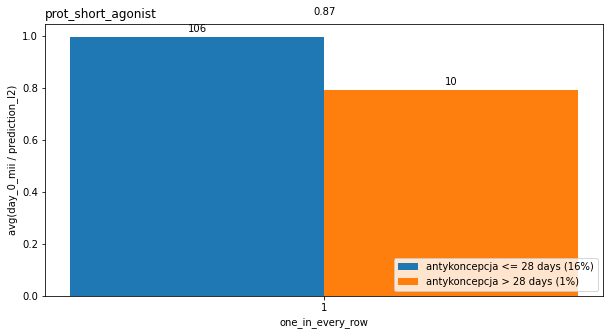

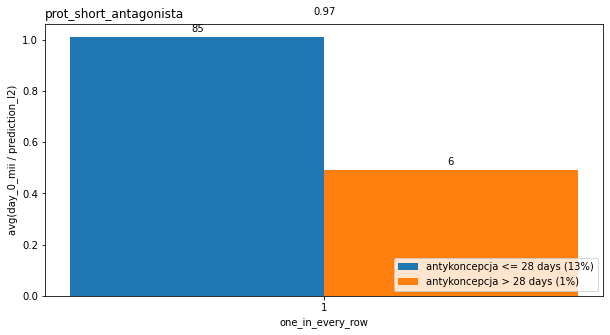

In [13]:
for prot_type in PROTOCOLS:

    PROT_DF = MERGED_PRIMARY_TEST_DF[MERGED_PRIMARY_TEST_DF['prot_type'] == prot_type]
    
    plot_results_with_segments_and_groups(
        PROT_DF,
        target_col='day_0_mii / prediction_l2',
        target_agg='avg',
        segmentation_col='days_count_Antykoncepcja_limited', top_segments=10, segments=None,
        groupby_col='one_in_every_row', groupby_round=0, groupby_min=0, groupby_max=12,
        groupby_dict=None,
        title=prot_type,
        legend_location='lower right')


# ANTYKONCEPCJA - WPŁYW NA ODPOWIEDŹ NA DAWKĘ

<span style='background:yellow'>
Uwagi / wnioski:
</span>

- Jeżeli coś widać to w protokole progesteronowym, ale danych jest mało

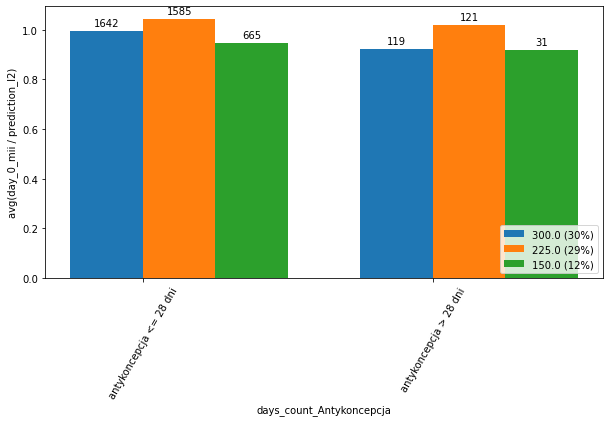

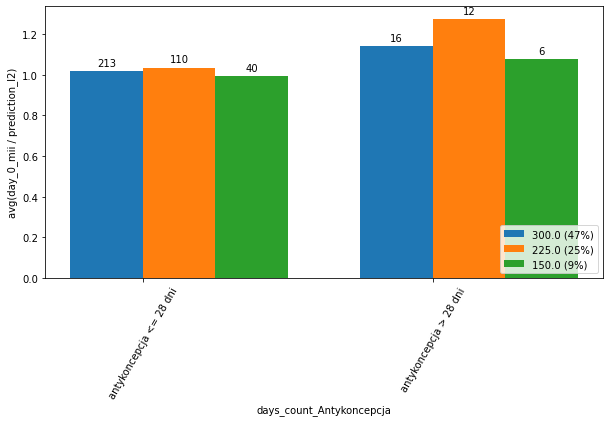

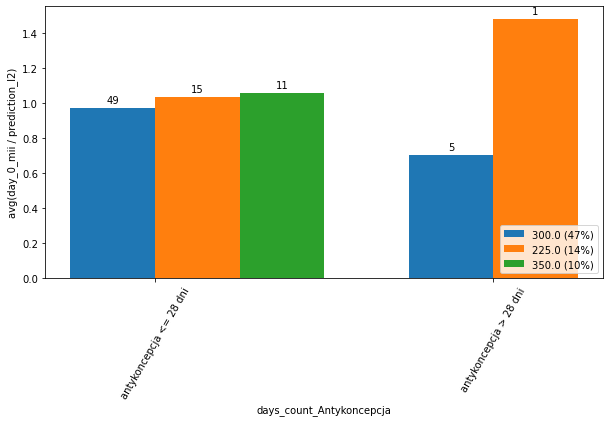

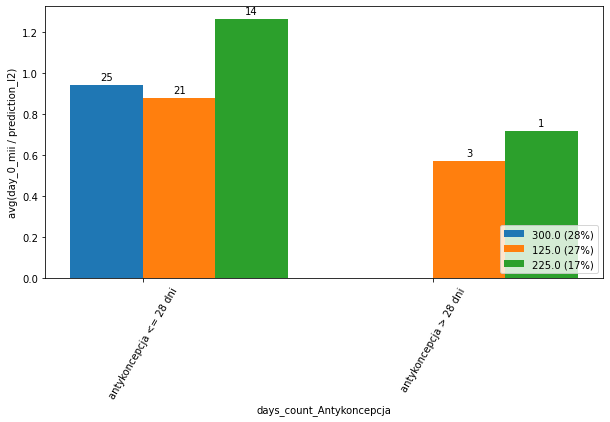

In [14]:
for prot_type in PROTOCOLS:

    PROT_DF = MERGED_PRIMARY_TEST_DF[MERGED_PRIMARY_TEST_DF['prot_type'] == prot_type]

    plot_results_with_segments_and_groups(
        PROT_DF,
        target_col='day_0_mii / prediction_l2',
        target_agg='avg',
        segmentation_col='ds1_3_dawka_dzienna', top_segments=3, segments=None,
        groupby_col='days_count_Antykoncepcja', groupby_round=0, groupby_min=0, groupby_max=50,
        groupby_dict=DICT_SPLIT_BY_VALUE_28,
        title="",
        legend_location='lower right')

# ANTYKONCEPCJA - WPŁYW NA MODEL PIERWOTNY

<span style='background:yellow'>
Uwagi / wnioski:
</span>

- Wpływ na model pierwotny jest niezauważalny

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the param

-
RMSE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   4.45    (-0.23)    (0.03)    
MAE[fold_avg][l2][900_cumulus_denuded]:        count:530    avg:7.64   3.17    (-0.22)    (0.02)    
MAPE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   0.74    (-0.12)    (-0.01)    
LIKELIHOOD[fold_avg][l2][900_cumulus_denuded]: count:530    avg:7.64   4.57    (0.00)    (0.00)    
-----------------------------
-
RMSE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   3.55    (-0.00)    (0.02)    
MAE[fold_avg][l2][900_day_0_mii]:              count:516    avg:5.92   2.60    (-0.05)    (0.01)    
MAPE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   0.72    (-0.04)    (0.00)    
LIKELIHOOD[fold_avg][l2][900_day_0_mii]:       count:516    avg:5.92   3.30    (0.00)    (0.00)    
-----------------------------
-
RMSE[fold_avg][l2][2015_cumulus_denuded]:      count:8673   avg:9.08   4.54    (-0.23)    (-0.00)    
MAE[fold_avg][l2][2015_cu

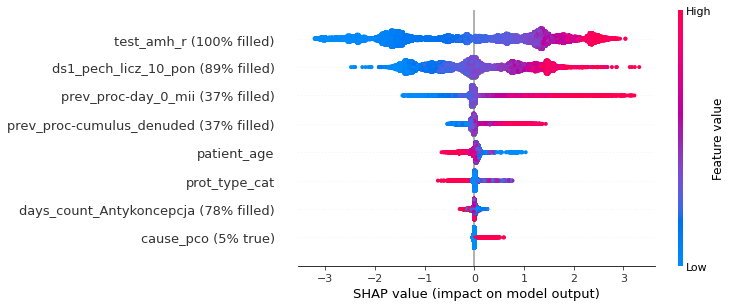

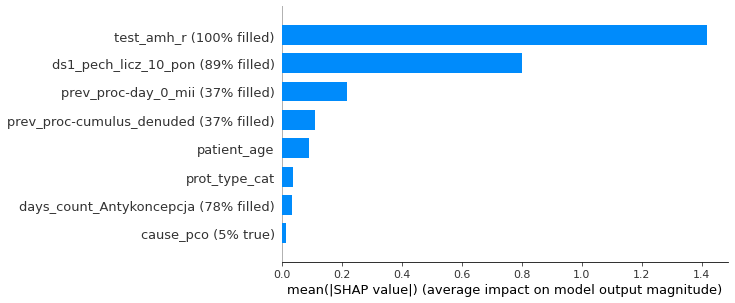

In [15]:
cols = PRIMARY_COLS + [
    'days_count_Antykoncepcja'
]

Y_RESULTS = train_data_series(
    LGB_PARAMS_BASE,
    DATA_SERIES,
    cols,
    model_suffixes_filter=['l2'])

Y_RESULTS.print_errors(
    BASE_RESULTS,
    print_suffixes=['l2'],
    print_avg=True,
)

explain_model(
    Y_RESULTS,
    data_serie_name='2015_day_0_mii',
    model_suffix='l2',
    folds=range(0, N_FOLDS))

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the param

-
RMSE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   4.45    (-0.22)    (0.03)    
MAE[fold_avg][l2][900_cumulus_denuded]:        count:530    avg:7.64   3.17    (-0.23)    (0.01)    
MAPE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   0.75    (-0.11)    (0.00)    
LIKELIHOOD[fold_avg][l2][900_cumulus_denuded]: count:530    avg:7.64   4.57    (0.00)    (0.00)    
-----------------------------
-
RMSE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   3.52    (-0.03)    (-0.01)    
MAE[fold_avg][l2][900_day_0_mii]:              count:516    avg:5.92   2.57    (-0.08)    (-0.01)    
MAPE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   0.70    (-0.06)    (-0.02)    
LIKELIHOOD[fold_avg][l2][900_day_0_mii]:       count:516    avg:5.92   3.30    (0.00)    (0.00)    
-----------------------------
-
RMSE[fold_avg][l2][2015_cumulus_denuded]:      count:8673   avg:9.08   4.54    (-0.23)    (-0.00)    
MAE[fold_avg][l2][2015_

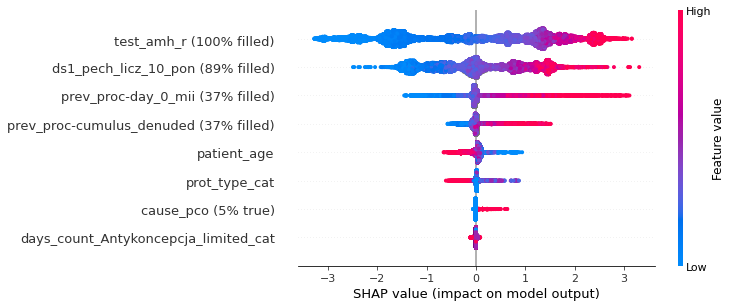

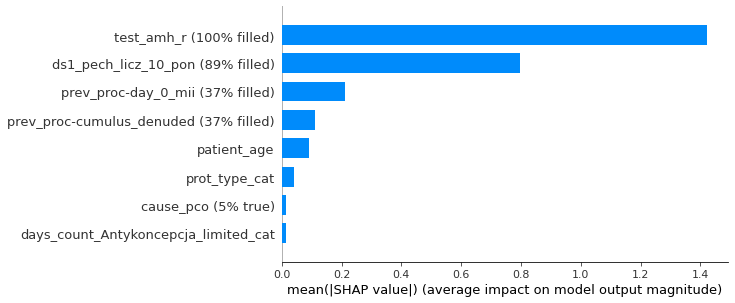

In [16]:
cols = PRIMARY_COLS + [
    'days_count_Antykoncepcja_limited_cat'
]

Y_RESULTS = train_data_series(
    LGB_PARAMS_BASE,
    DATA_SERIES,
    cols,
    model_suffixes_filter=['l2'])

Y_RESULTS.print_errors(
    BASE_RESULTS,
    print_suffixes=['l2'],
    print_avg=True,
)

explain_model(
    Y_RESULTS,
    data_serie_name='2015_day_0_mii',
    model_suffix='l2',
    folds=range(0, N_FOLDS))

# DZIEN CYKLU W DS1 - PODSTAWOWE DANE

<span style='background:yellow'>
Uwagi / wnioski:
</span>

- Zdecydowana większość protokołów długich zaczyna się od 1 do 7 dnia cyklu z przewagą dni 3-5.
- Zdecydowana większość protokołów z progesteronem zaczyna się od 1 do 5 dnia cyklu.
- Zdecydowana większość protokołów krótkich z agonistą lub z antagonistą zaczyna się od 1 do 4 dnia cyklu.

- Wydaje się, że jest to zgodne z odgórnymi zaleceniami.
- Z zaleceń które usłyszeliśmy wynika, że protokoły krótkie powinny być rozpoczynane maksymalnie w 4 dniu cyklu i to się w większości przypadków zgadza.

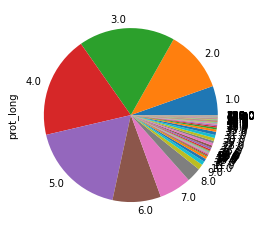

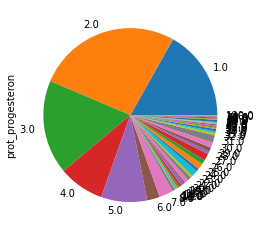

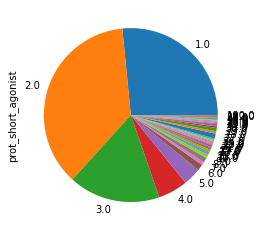

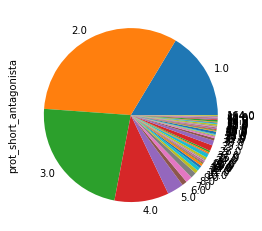

In [17]:
for prot_type in PROTOCOLS:

    PROT_DF = MERGED_PRIMARY_TEST_DF[MERGED_PRIMARY_TEST_DF['prot_type'] == prot_type]   
    PROT_DF = PROT_DF['ds1_dc'].value_counts().sort_index()
    PROT_DF.plot.pie(label=prot_type)
    plt.show()

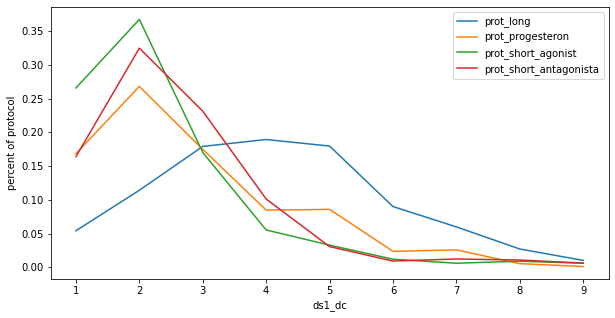

In [18]:
_fig, ax = plt.subplots(figsize=(10, 5))

MAX_VALUE = 10

for prot_type in PROTOCOLS:

    PROT_DF = MERGED_PRIMARY_TEST_DF[MERGED_PRIMARY_TEST_DF['prot_type'] == prot_type]    
    PROT_DF = PROT_DF['ds1_dc'].value_counts(normalize=True).sort_index()
    PROT_DF = PROT_DF[PROT_DF.index < MAX_VALUE]
    PROT_DF.plot(label=prot_type)

ax.set_ylabel(f'percent of protocol')
ax.set_xlabel(f'ds1_dc')
ax.legend(loc='upper right')

# DZIEŃ CYKLU W DS1 - ANALIZA ZALEŻNOŚCI

<span style='background:yellow'>
Uwagi / wnioski:
</span>

- Danych poza rekomendowanymi dniami jest bardzo mało, trudno wysnówać jednoznaczne wnioski

In [19]:
DICT_SPLIT_BY_VALUE_4 = {}
for value in MERGED_PRIMARY_TEST_DF['ds1_dc'].unique():
    if np.isnan(value):
        continue
    if value <= 4:
        DICT_SPLIT_BY_VALUE_4[value] = "dzien cyklu w ds1 <= 4"
    else:
        DICT_SPLIT_BY_VALUE_4[value] = "dzien cyklu w ds1 > 4"

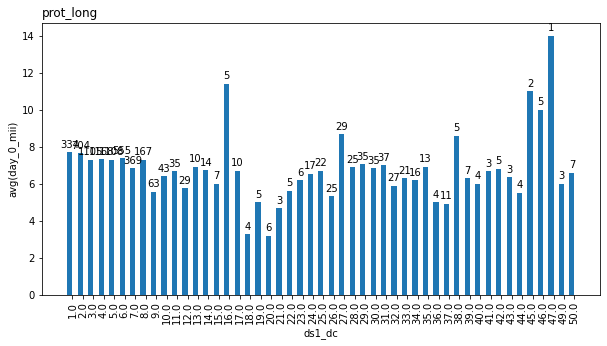

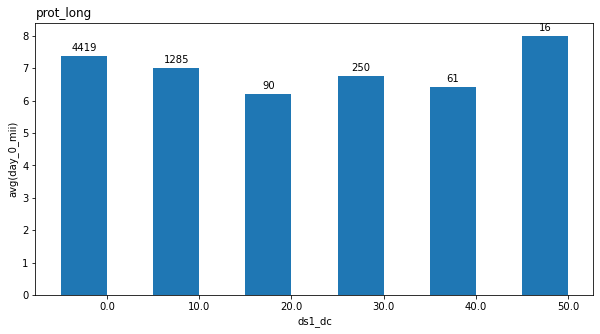

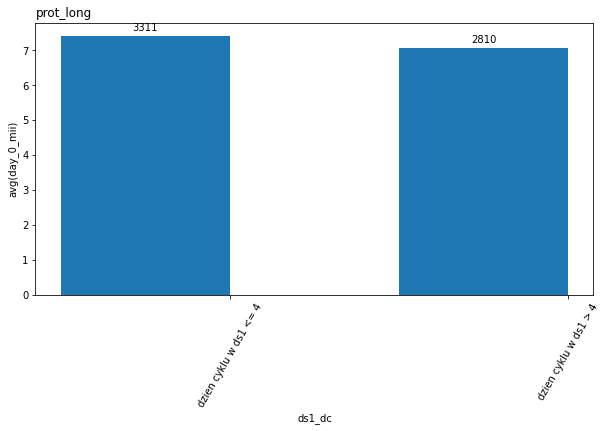

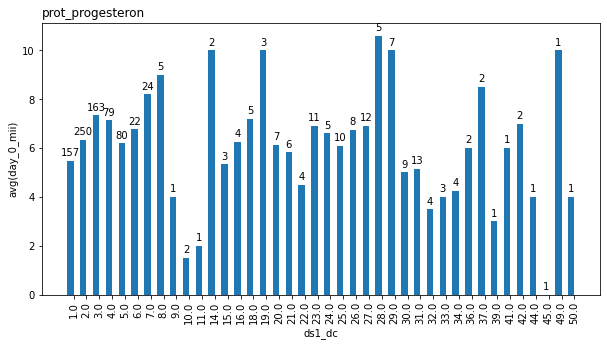

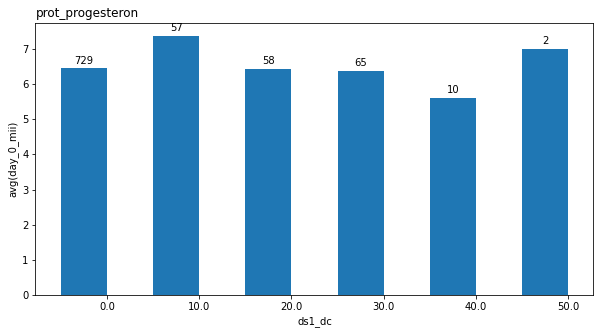

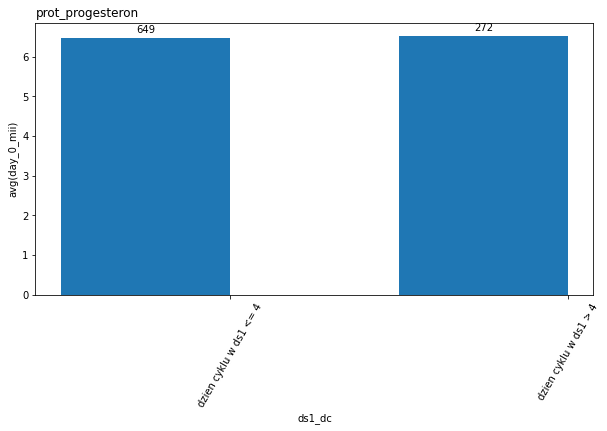

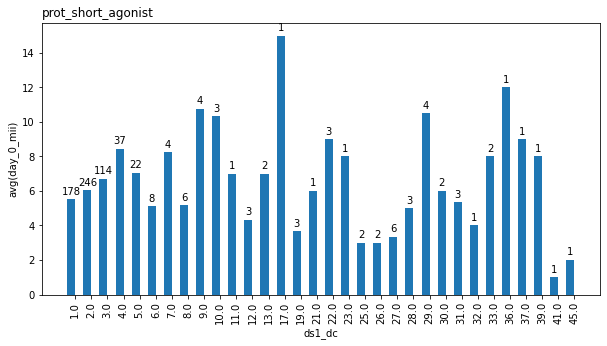

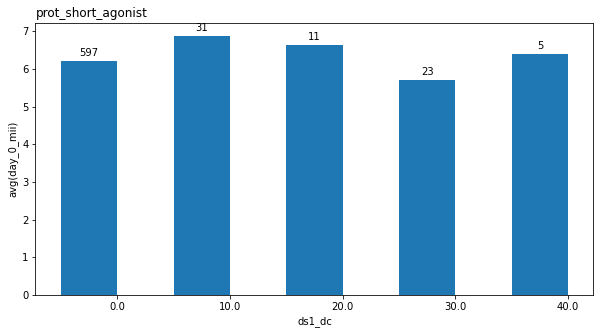

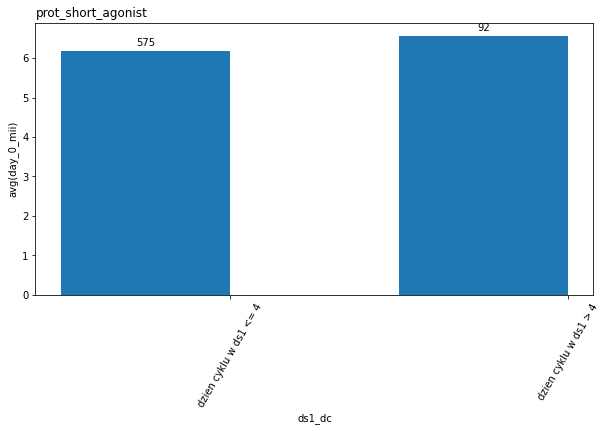

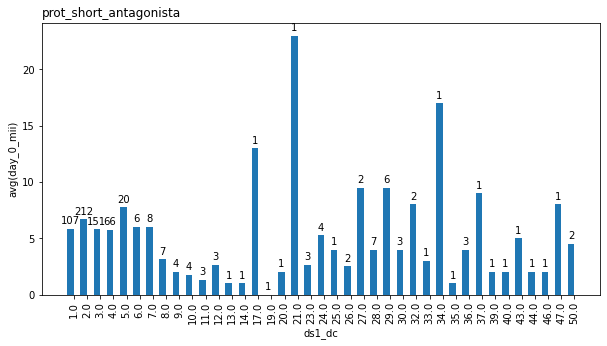

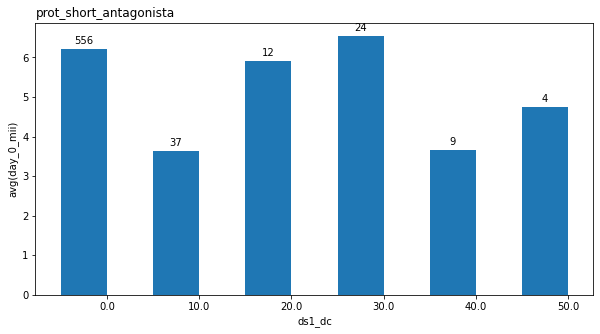

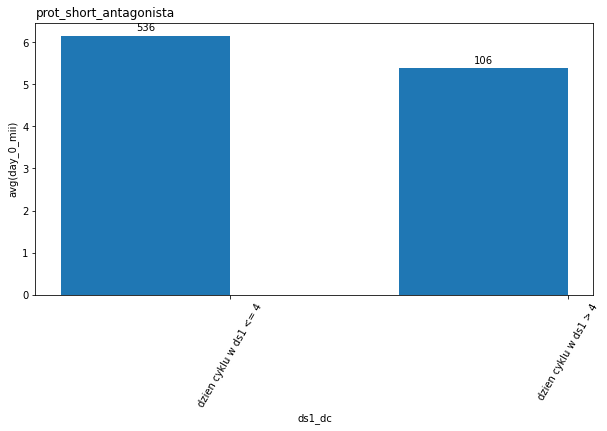

In [20]:
for prot_type in PROTOCOLS:

    PROT_DF = MERGED_PRIMARY_TEST_DF[MERGED_PRIMARY_TEST_DF['prot_type'] == prot_type]

    plot_results_with_segments_and_groups(
        PROT_DF,
        target_col='day_0_mii',
        target_agg='avg',
        segmentation_col='one_in_every_row', top_segments=10, segments=None,
        groupby_col='ds1_dc', groupby_round=0, groupby_min=0, groupby_max=50,
        groupby_dict=None,
        title=prot_type,
        legend_location=None)
    
    plot_results_with_segments_and_groups(
        PROT_DF,
        target_col='day_0_mii',
        target_agg='avg',
        segmentation_col='one_in_every_row', top_segments=10, segments=None,
        groupby_col='ds1_dc', groupby_round=-1, groupby_min=0, groupby_max=50,
        groupby_dict=None,
        title=prot_type,
        legend_location=None)
    
    plot_results_with_segments_and_groups(
        PROT_DF,
        target_col='day_0_mii',
        target_agg='avg',
        segmentation_col='one_in_every_row', top_segments=10, segments=None,
        groupby_col='ds1_dc', groupby_round=0, groupby_min=0, groupby_max=50,
        groupby_dict=DICT_SPLIT_BY_VALUE_4,
        title=prot_type,
        legend_location=None)


# DZIEŃ CYKLU W DS1 - ANALIZA COUNTERFACTUALNA

<span style='background:yellow'>
Uwagi / wnioski:
</span>

- W protokole długim wydaje się, że im wcześniej tym lepiej

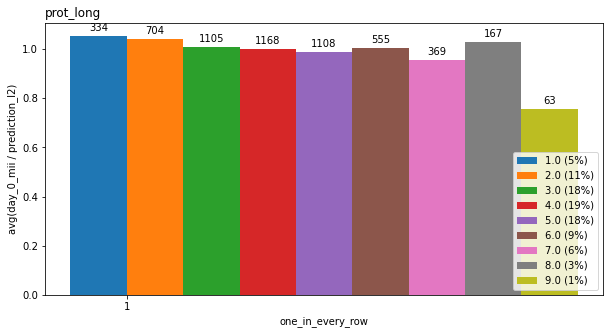

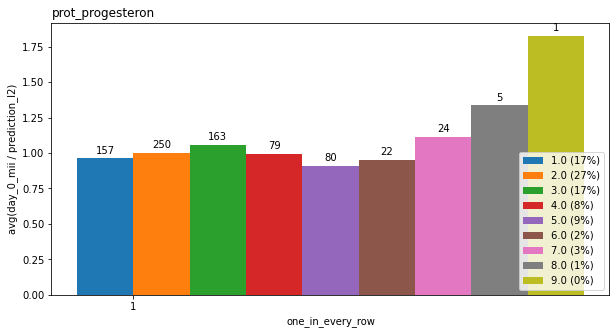

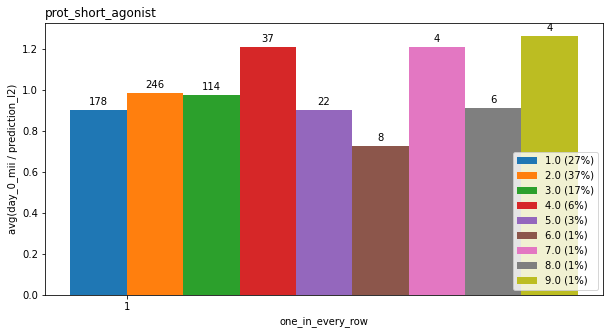

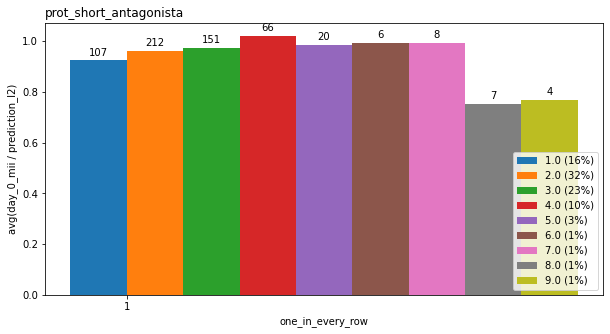

In [21]:
for prot_type in PROTOCOLS:

    PROT_DF = MERGED_PRIMARY_TEST_DF[MERGED_PRIMARY_TEST_DF['prot_type'] == prot_type]
    
    plot_results_with_segments_and_groups(
        PROT_DF,
        target_col='day_0_mii / prediction_l2',
        target_agg='avg',
        segmentation_col='ds1_dc', top_segments=4, segments=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0],
        groupby_col='one_in_every_row', groupby_round=0, groupby_min=0, groupby_max=10,
        groupby_dict=None,
        title=prot_type,
        legend_location='lower right')

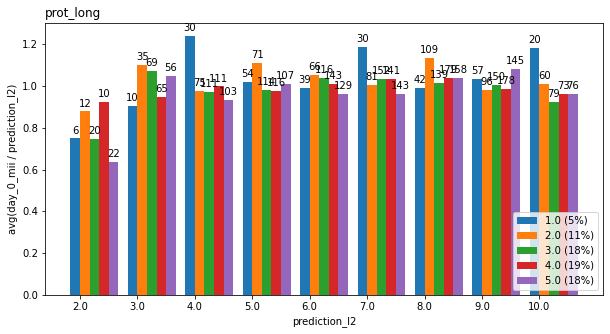

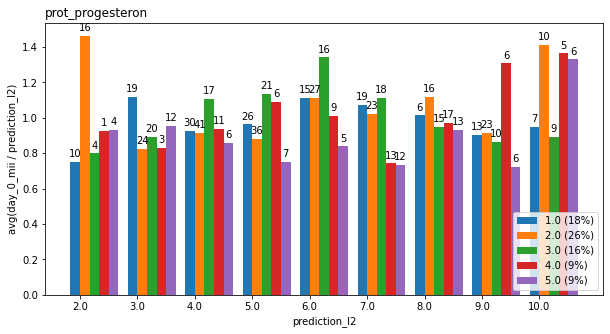

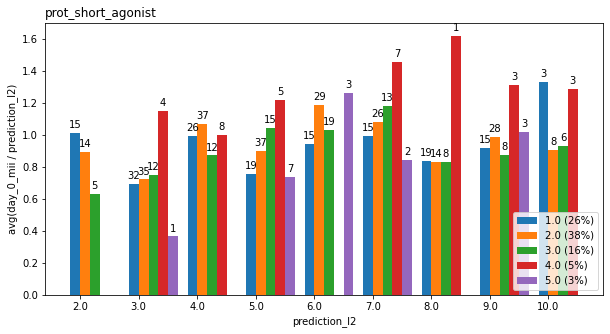

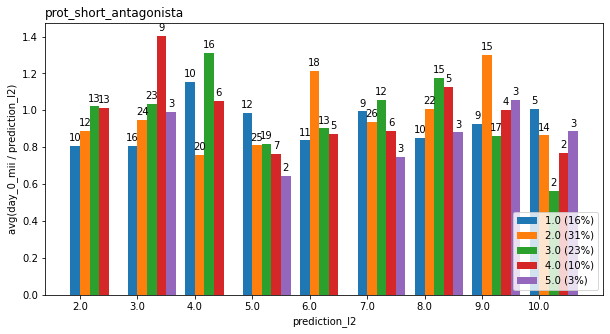

In [22]:
for prot_type in PROTOCOLS:

    PROT_DF = MERGED_PRIMARY_TEST_DF[MERGED_PRIMARY_TEST_DF['prot_type'] == prot_type]
    
    plot_results_with_segments_and_groups(
        PROT_DF,
        target_col='day_0_mii / prediction_l2',
        target_agg='avg',
        segmentation_col='ds1_dc', top_segments=4, segments=[1.0, 2.0, 3.0, 4.0, 5.0],
        groupby_col='prediction_l2', groupby_round=0, groupby_min=0, groupby_max=10,
        groupby_dict=None,
        title=prot_type,
        legend_location='lower right')

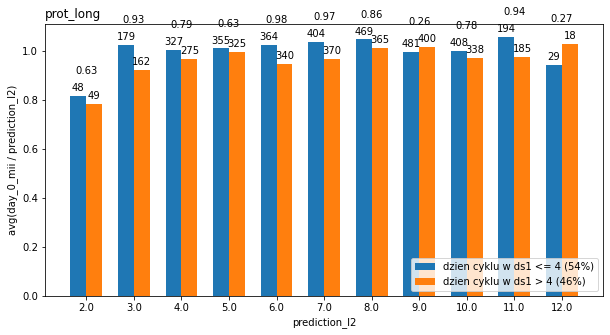

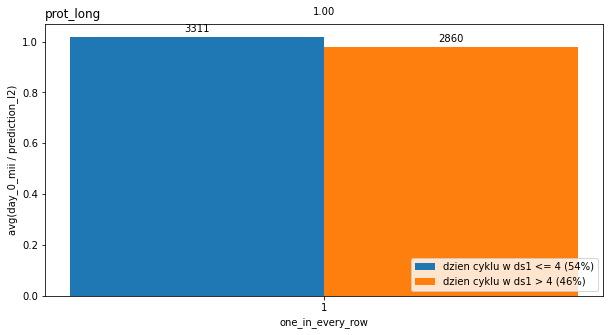

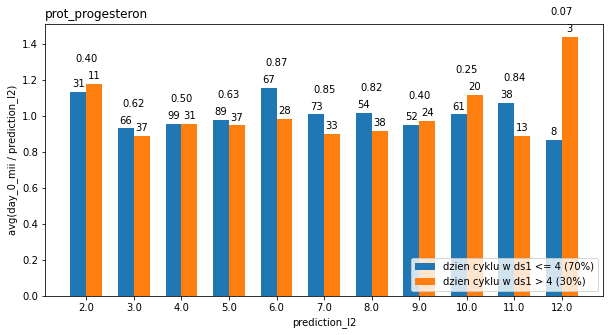

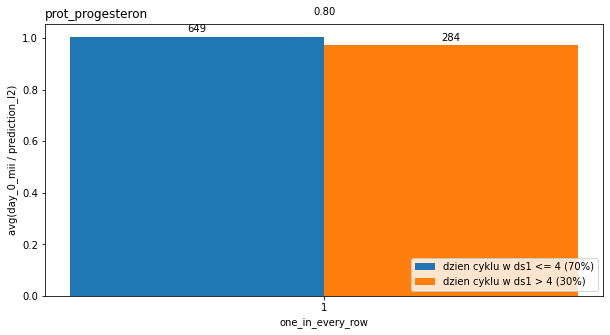

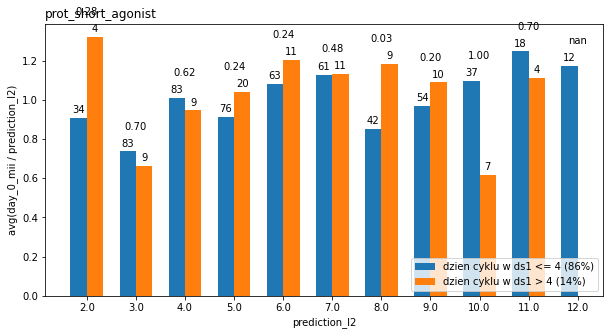

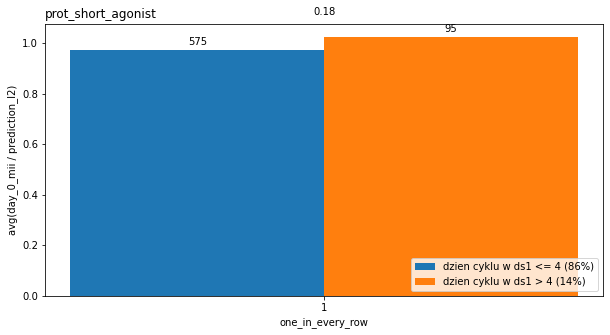

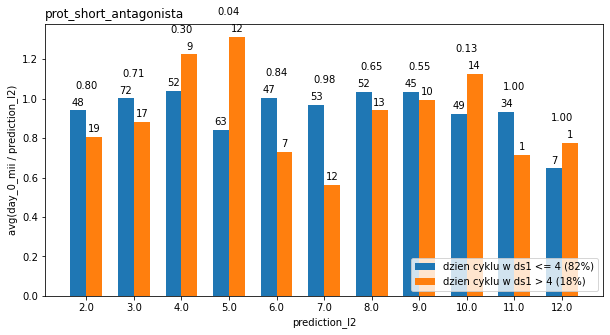

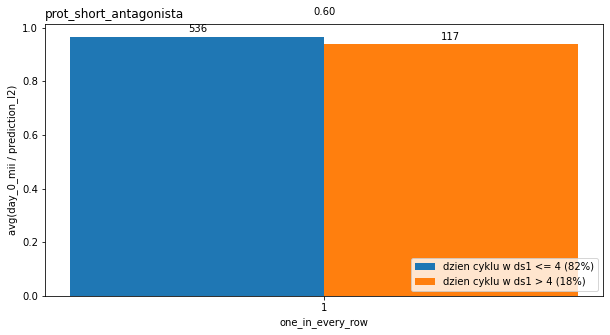

In [23]:
for prot_type in PROTOCOLS:

    PROT_DF = MERGED_PRIMARY_TEST_DF[MERGED_PRIMARY_TEST_DF['prot_type'] == prot_type]
    
    plot_results_with_segments_and_groups(
        PROT_DF,
        target_col='day_0_mii / prediction_l2',
        target_agg='avg',
        segmentation_col='ds1_dc_limited_by_4', top_segments=10, segments=None,
        groupby_col='prediction_l2', groupby_round=0, groupby_min=0, groupby_max=12,
        groupby_dict=None,
        title=prot_type,
        legend_location='lower right')
    
    plot_results_with_segments_and_groups(
        PROT_DF,
        target_col='day_0_mii / prediction_l2',
        target_agg='avg',
        segmentation_col='ds1_dc_limited_by_4', top_segments=10, segments=None,
        groupby_col='one_in_every_row', groupby_round=0, groupby_min=0, groupby_max=12,
        groupby_dict=None,
        title=prot_type,
        legend_location='lower right')

# DZIEŃ CYKLU W DS1 - WPŁYW NA MODEL PIERWOTNY

<span style='background:yellow'>
Uwagi / wnioski:
</span>

- Wpływ na model pierwotny jest niezauważalny

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the param

-
RMSE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   4.45    (-0.22)    (0.03)    
MAE[fold_avg][l2][900_cumulus_denuded]:        count:530    avg:7.64   3.17    (-0.22)    (0.02)    
MAPE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   0.75    (-0.11)    (-0.00)    
LIKELIHOOD[fold_avg][l2][900_cumulus_denuded]: count:530    avg:7.64   4.57    (0.00)    (0.00)    
-----------------------------
-
RMSE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   3.51    (-0.04)    (-0.02)    
MAE[fold_avg][l2][900_day_0_mii]:              count:516    avg:5.92   2.57    (-0.08)    (-0.01)    
MAPE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   0.70    (-0.05)    (-0.01)    
LIKELIHOOD[fold_avg][l2][900_day_0_mii]:       count:516    avg:5.92   3.30    (0.00)    (0.00)    
-----------------------------
-
RMSE[fold_avg][l2][2015_cumulus_denuded]:      count:8673   avg:9.08   4.54    (-0.23)    (-0.00)    
MAE[fold_avg][l2][2015

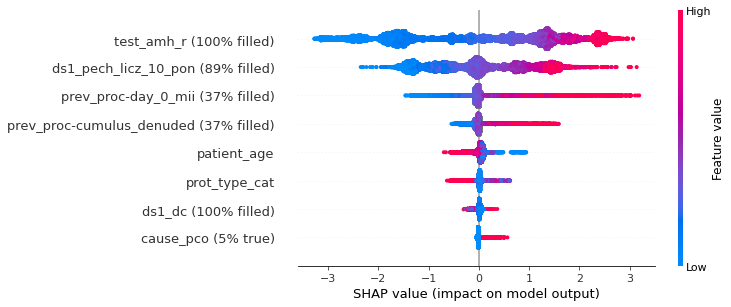

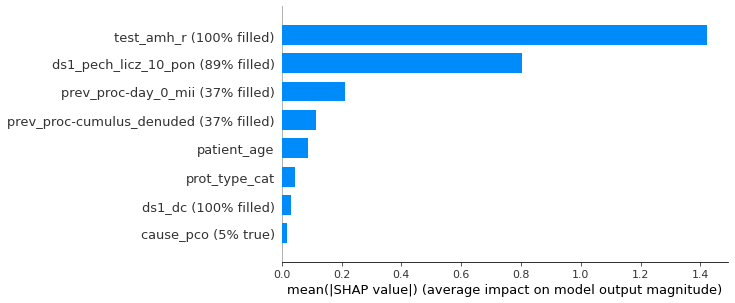

In [24]:
cols = PRIMARY_COLS + [
    'ds1_dc'
]

Y_RESULTS = train_data_series(
    LGB_PARAMS_BASE,
    DATA_SERIES,
    cols,
    model_suffixes_filter=['l2'])

Y_RESULTS.print_errors(
    BASE_RESULTS,
    print_suffixes=['l2'],
    print_avg=True,
)

explain_model(
    Y_RESULTS,
    data_serie_name='2015_day_0_mii',
    model_suffix='l2',
    folds=range(0, N_FOLDS))

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the param

-
RMSE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   4.45    (-0.23)    (0.03)    
MAE[fold_avg][l2][900_cumulus_denuded]:        count:530    avg:7.64   3.17    (-0.22)    (0.02)    
MAPE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   0.76    (-0.11)    (0.00)    
LIKELIHOOD[fold_avg][l2][900_cumulus_denuded]: count:530    avg:7.64   4.57    (0.00)    (0.00)    
-----------------------------
-
RMSE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   3.53    (-0.02)    (0.00)    
MAE[fold_avg][l2][900_day_0_mii]:              count:516    avg:5.92   2.58    (-0.07)    (-0.00)    
MAPE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   0.71    (-0.04)    (-0.00)    
LIKELIHOOD[fold_avg][l2][900_day_0_mii]:       count:516    avg:5.92   3.30    (0.00)    (0.00)    
-----------------------------
-
RMSE[fold_avg][l2][2015_cumulus_denuded]:      count:8673   avg:9.08   4.54    (-0.23)    (-0.00)    
MAE[fold_avg][l2][2015_c

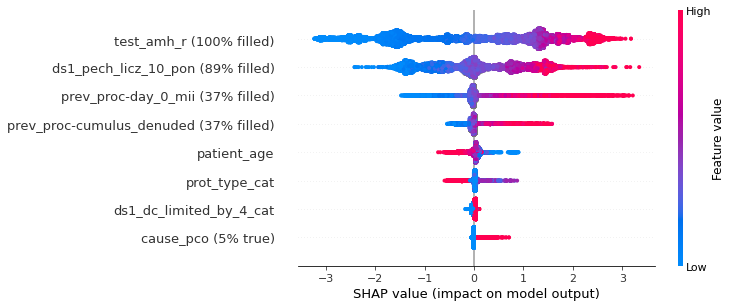

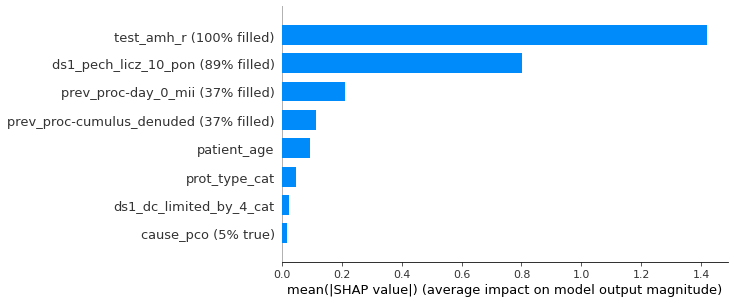

In [25]:
cols = PRIMARY_COLS + [
    'ds1_dc_limited_by_4_cat'
]

Y_RESULTS = train_data_series(
    LGB_PARAMS_BASE,
    DATA_SERIES,
    cols,
    model_suffixes_filter=['l2'])

Y_RESULTS.print_errors(
    BASE_RESULTS,
    print_suffixes=['l2'],
    print_avg=True,
)

explain_model(
    Y_RESULTS,
    data_serie_name='2015_day_0_mii',
    model_suffix='l2',
    folds=range(0, N_FOLDS))

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the param

-
RMSE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   4.43    (-0.24)    (0.02)    
MAE[fold_avg][l2][900_cumulus_denuded]:        count:530    avg:7.64   3.16    (-0.24)    (-0.00)    
MAPE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   0.75    (-0.11)    (-0.01)    
LIKELIHOOD[fold_avg][l2][900_cumulus_denuded]: count:530    avg:7.64   4.57    (0.00)    (0.00)    
-----------------------------
-
RMSE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   3.53    (-0.02)    (0.00)    
MAE[fold_avg][l2][900_day_0_mii]:              count:516    avg:5.92   2.58    (-0.07)    (-0.00)    
MAPE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   0.71    (-0.04)    (-0.00)    
LIKELIHOOD[fold_avg][l2][900_day_0_mii]:       count:516    avg:5.92   3.30    (0.00)    (0.00)    
-----------------------------
-
RMSE[fold_avg][l2][2015_cumulus_denuded]:      count:8673   avg:9.08   4.54    (-0.23)    (-0.00)    
MAE[fold_avg][l2][2015

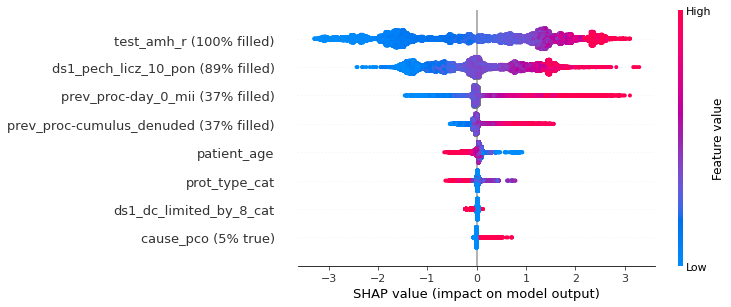

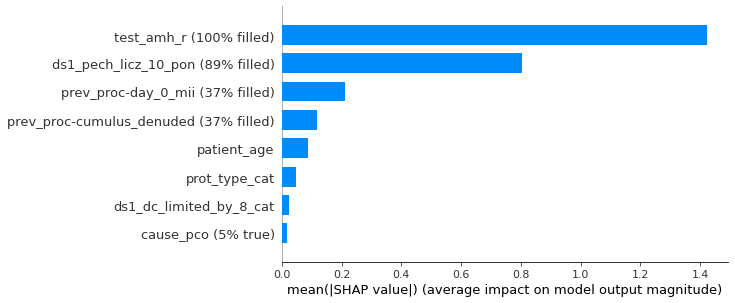

In [26]:
cols = PRIMARY_COLS + [
    'ds1_dc_limited_by_8_cat'
]

Y_RESULTS = train_data_series(
    LGB_PARAMS_BASE,
    DATA_SERIES,
    cols,
    model_suffixes_filter=['l2'])

Y_RESULTS.print_errors(
    BASE_RESULTS,
    print_suffixes=['l2'],
    print_avg=True,
)

explain_model(
    Y_RESULTS,
    data_serie_name='2015_day_0_mii',
    model_suffix='l2',
    folds=range(0, N_FOLDS))